# Read Data from CSV

## Import the dependencies.

In [25]:
import pandas as pd

# Import the CSV file to read

In [1]:
file_path = "../../data/data_example.csv"
loaded_data = pd.read_csv(file_path, header=3)
loaded_data.head()

NameError: name 'pd' is not defined

## Parse the data per field

In [27]:
fields = loaded_data['_field'].unique().tolist()[3:]
print(fields)
data = pd.DataFrame()
data['_time'] = pd.to_datetime(loaded_data[loaded_data['_field'] == fields[0]]['_time'].tolist())
data.set_index('_time', inplace=True)
for field in fields:
    field_df = loaded_data[loaded_data['_field'] == field]
    field_list = field_df['_value'].tolist()
    if len(field_list) != len(data):
        print(f"Data {field} length not equal")
        continue
    data[field] = field_list
    
data.head()

## Plot the Gyro data

<Axes: xlabel='_time'>

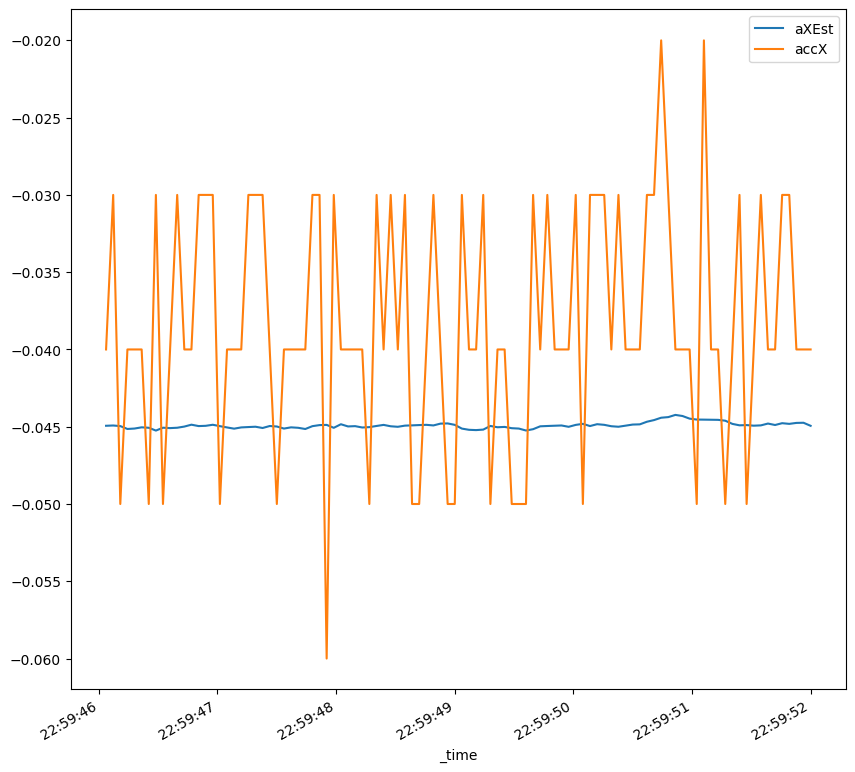

In [31]:
cols = data.columns.tolist()
cols = [col for col in cols if "gyro" in col]

gyro_data = data[cols]
gyro_data = gyro_data.head(100)
gyro_data.plot(figsize=(10, 10), subplots=False)  # Set "subplots" to True to plot each column on a separate subplot